# Homework 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Principal Component Analysis

1. The principal components are the directions in which data points are correlated. In this sense, the computation of the principal components requires the data to be standardized so that we are actually seeing how much data correlates depending on the feature. If the data were not standardized, we would be seeing the correlation of units, not the data itself. If we didn't standardize the data, we could change the units along a given feature and thus the variance along that direction would scale accordingly. This would essentially give us a useless metric, since we could arbitrarily choose the principal component corresponding to largest singular value, obtained by arbitrarily scaling that direction.

2. The loadings are the components of the unit vector that points in the direction of the highest variability in the data. If we pretend the data is normally distributed, then the image of the euclidean ball under the covariance matrix is an ellipsoid, and the longest axis, normalized, would be the first principal component, and the loadings would be its components. The scores for each sample are the inner product with the principal component, i.e. how much does this sample vary along this axis. 

3. Code

In [8]:
college_df = pd.read_csv('data/College.csv',  true_values=['Yes'], false_values=['No'])
college_df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,True,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,True,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,True,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,True,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,True,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


4. Code

In [9]:
# standardize columns
college_df = (college_df - college_df.mean()) / college_df.std()

In [19]:
from sklearn.decomposition import PCA
# fit PCA
pca = PCA(n_components=2)
pca.fit(college_df)

PCA(n_components=2)

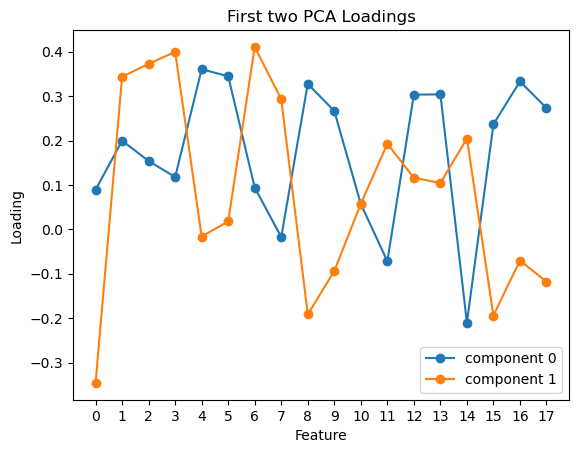

In [22]:
# plot loadings
plt.figure
for i, component in enumerate(pca.components_):
    plt.plot(component, marker = 'o', label = f'component {i}')
plt.legend()
plt.xlabel('Feature')
plt.xticks(np.arange(len(college_df.columns)))
plt.ylabel('Loading')
plt.title('First two PCA Loadings')
plt.show()

In [ ]:
# where do variables load
factor_loadings_ids = np.argmax(np.abs(pca.components_), axis=0) # for each feature get the factor it loads on most
factor_loadings = pd.DataFrame({'feature': college_df.columns, 'factor': factor_loadings_ids})
print(factor_loadings)

        feature  factor
0       Private       1
1          Apps       1
2        Accept       1
3        Enroll       1
4     Top10perc       0
5     Top25perc       0
6   F.Undergrad       1
7   P.Undergrad       1
8      Outstate       0
9    Room.Board       0
10        Books       1
11     Personal       1
12          PhD       0
13     Terminal       0
14    S.F.Ratio       0
15  perc.alumni       0
16       Expend       0
17    Grad.Rate       0


The 5 variables that load more into the first factor are Private, number of applications, the number of students accepted, the number of students enrolled, and number of enrolled fulltime and part time undergrads. These obviously vary with each other, since varying any of these coordinates will very likely vary the others.

The 5 variables that load more onto the second factor are the percent of new students from the top 10/25% of their high school class, out of state tuition, room and board costs, percent of the faculty with PhDs/Terminal degrees, and the student to faculty ratio. These make slightly more sense, since better schools with more PhDs and lower student to faculty ration will generally correlate with high tuition, room and board, and also more students that were the top of their class. 

5. Code

In [38]:
sorted_scores_id = np.argsort(np.abs(pca.transform(college_df)), axis = 0)
score_sorted_college_df = pd.DataFrame(
    {'Factor 1': sorted_scores_id[:, 0], 
     'Factor 2': sorted_scores_id[:, 1]}
    )
print(f"The top 5 samples sorted by scores in the first factor are:\n {college_df.iloc[score_sorted_college_df['Factor 1'][:5], :5]}")
print(f"The bottom 5 samples sorted by scores in the first factor are:\n {college_df.iloc[score_sorted_college_df['Factor 1'][-5:], :5]}")
print(f"The top 5 samples sorted by scores in the second factor are:\n {college_df.iloc[score_sorted_college_df['Factor 2'][:5], :5]}")
print(f"The bottom 5 samples sorted by scores in the second factor are:\n {college_df.iloc[score_sorted_college_df['Factor 2'][-5:], :5]}")

The top 5 samples sorted by scores in the first factor are:
       Private      Apps    Accept    Enroll  Top10perc
622 -1.631461  0.149440  0.238339  0.911589   0.478530
209  0.612159 -0.567836 -0.565785 -0.537006   0.081713
603 -1.631461 -0.311260 -0.309575  0.170072  -0.201728
131  0.612159 -0.643542 -0.655948 -0.639247  -0.258416
132  0.612159 -0.660854 -0.677163 -0.708125   0.365154
The bottom 5 samples sorted by scores in the first factor are:
       Private      Apps    Accept    Enroll  Top10perc
158  0.612159  1.443171  0.103706  0.330429   3.369627
174  0.612159  2.787287  0.764630  0.864235   3.539691
250  0.612159  2.806924  0.059645  0.888989   3.539691
775  0.612159  1.990429  0.177142  0.577960   3.823132
284  0.612159  1.413973  0.582264  0.141014   2.689369
The top 5 samples sorted by scores in the second factor are:
       Private      Apps    Accept    Enroll  Top10perc
671  0.612159 -0.179742 -0.121498 -0.260417  -0.258416
221  0.612159  2.096367  0.351757  0.656525

6. The first factor captures the size of the school and the second factor captures the resources and quality of the school.

7. Code

In [40]:
scores = pca.transform(college_df)
print(f'The variance of the scores for the prinicpal components are: {scores.var(axis = 0)}')

The variance of the scores for the prinicpal components are: [5.45290636 5.04957944]


The variance of the first score is higher than the variance of the second score. This makes sense, since the first factor should explain most of the variability in the data, and the second factor should explain any of the variability that the second score does not.

## 2. Matrix Completion

1. A simple choice of vectors $(a_i)_{i=1}^N$ and $(b_j)_{j=1}^p$ is to let $a_i = 1$, for all $i$, and let $b_j = \overline{x}_j$. This implementation of the baseline approach is good because we can get interpretation how we are treating the samples in our imputation. In this example, we assume that all of samples are drawn from the same distribution and each of our columns is also independent. This approach makes explicit this assumption.

2. In our baseline, we assumed that all of the samples were drawn from the same distribution. However, if we change the weighting, i.e. change $a_i$ from 1, we can parameterize our distribution to account for this difference. In other words, we now assume that each sample first draws a parameter from some distribution and then based on that parameter, draws the actual sample from a distribution parameterized by that parameter. This leads us to want to impute the value in a biased way.
Given our missing sample in column j, we want to fill that missing sample from a weighted mean that weighs samples higher, if their column entries, in other columns, are more similar to the other column entries in our missing sample.

3. PCA leads to fill in the values using a weighted mean based on samples that are correlated with our missing sample. In fact, if we imputed the matrix with the baseline, and then ran PCA on this imputed matrix, the $a_i$'s would exactly be a weighted average biased towards samples the covary with the missing sample. 